In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('/home/akeemlag/Downloads/SCFP2022.csv')
df

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [4]:
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
df_fear

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [5]:
age_groups = df_fear['AGECL'].unique()
age_groups

array([1, 4, 2, 3, 5, 6])

In [7]:
agecl_dict = {
    1: 'Under 35',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '75 or Older'
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
age_cl.head()

20    Under 35
21    Under 35
22    Under 35
23    Under 35
24    Under 35
Name: AGECL, dtype: object

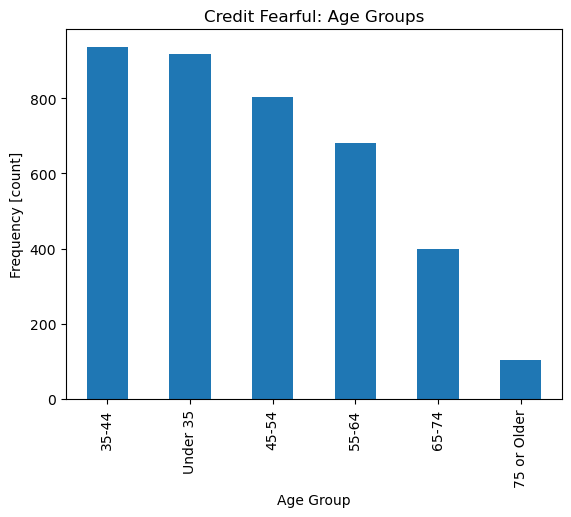

In [9]:
age_cl_value_counts = age_cl.value_counts()

age_cl_value_counts.plot(
    kind='bar',
    xlabel='Age Group',
    ylabel='Frequency [count]',
    title='Credit Fearful: Age Groups');

<AxesSubplot: >

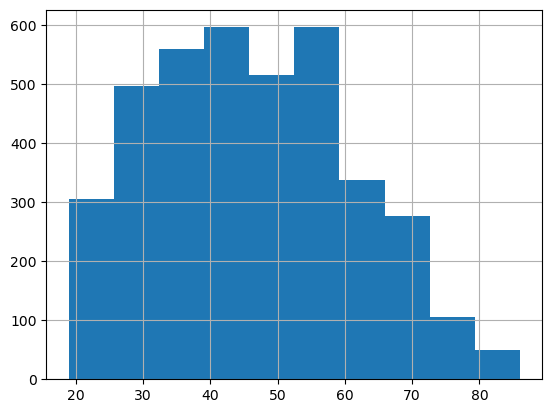

In [10]:
df_fear['AGE'].hist(bins=10)

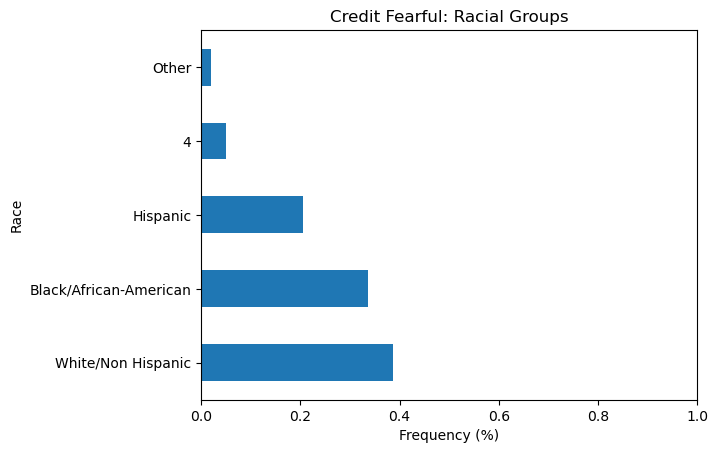

In [12]:
race_dict = {
    1: "White/Non Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other"
}

race = df_fear['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

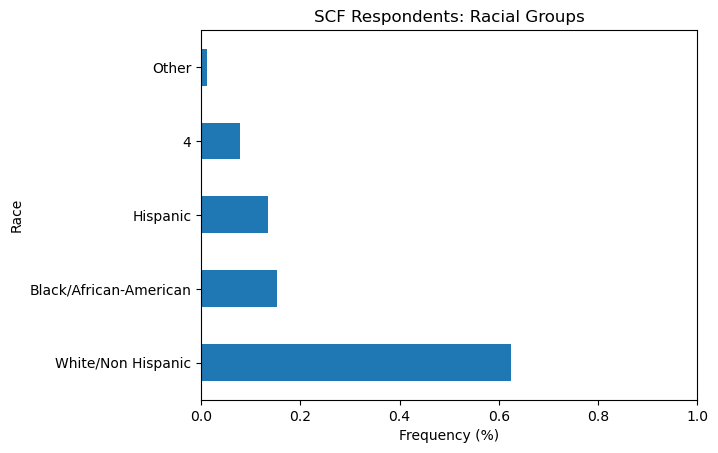

In [13]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [16]:
df.INCCAT.unique()

array([2, 5, 6, 4, 3, 1])

In [25]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}
df_incc = (df["INCCAT"]
        .replace(inccat_dict)
        .groupby(df["TURNFEAR"])
        .value_counts(normalize=True)
        .rename('frequency')
        .to_frame()
        .reset_index())

df_incc

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


In [21]:
df.groupby(['TURNFEAR'])['INCCAT'].value_counts(normalize=True).rename('frequency').reset_index()

,TURNFEAR,INCCAT,frequency
0,0,6,0.303982
1,0,4,0.162312
2,0,3,0.144492
3,0,1,0.140050
4,0,2,0.139162
5,0,5,0.110002
6,1,1,0.340714
7,1,2,0.266476
8,1,3,0.205001
9,1,4,0.112529


<AxesSubplot: xlabel='INCCAT', ylabel='frequency'>

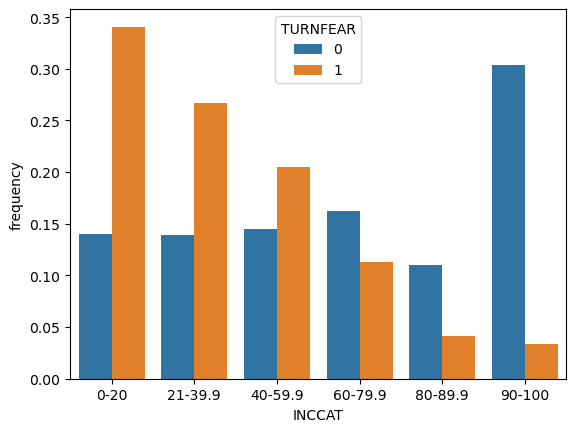

In [30]:
sns.barplot(x="INCCAT", y="frequency", hue="TURNFEAR", data=df_incc, order=inccat_dict.values())

In [34]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
asset_house_corr

0.5617763110086196

In [35]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
asset_house_corr

0.3649483861558831

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]